In [772]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [773]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#dataset = pd.concat((train, test), axis=0)

#train_len = len(train)

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [774]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [775]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [776]:
train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [777]:
# Check for duplicates in dataset
ds = len(set(train['Id']))
total = dataset.shape[0]
dup = total - ds
dup

1457

In [778]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

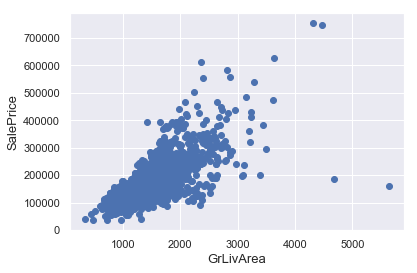

In [779]:
# Explore outliers
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

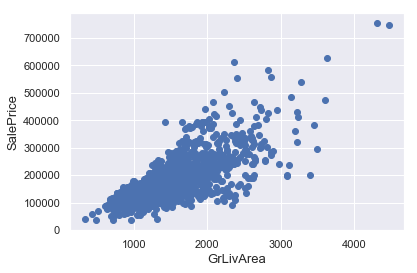

In [780]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
#dataset = dataset.drop(dataset[(dataset['GrLivArea']>4000) & (dataset['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


 mu = 12.02 and sigma = 0.40



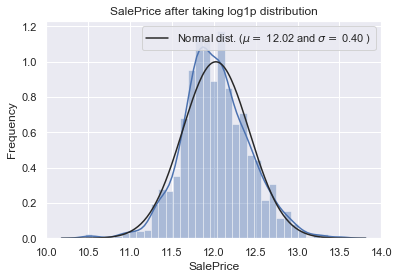

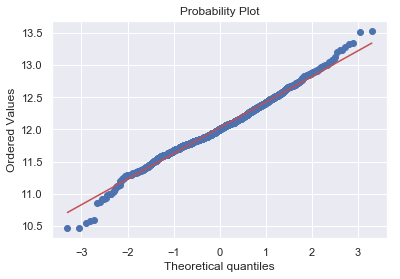

In [781]:
train['SalePrice'] = np.log1p(train['SalePrice'])


sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice after taking log1p distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [782]:
#dataset['SalePrice'] = np.log1p(dataset['SalePrice'])
#dataset['SalePrice'].head()
train['SalePrice'].head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [783]:
ntrain = train.shape[0]
ntest = test.shape[0]
y = train['SalePrice']
#y_train = train.SalePrice.values
dataset = pd.concat((train, test)).reset_index(drop=True)
dataset.drop(['SalePrice'], axis=1, inplace=True)
print("dataset size is : {}".format(dataset.shape))

dataset size is : (2917, 79)


In [784]:
corr = train.corr()
#plt.subplots(figsize=(20,15))
#sns.heatmap(corr, annot = True, fmt='.2f', cmap='Greens')

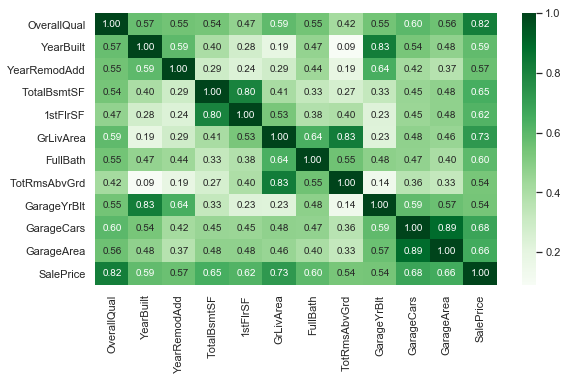

In [785]:
large_corr = corr.index[abs(corr['SalePrice']) > 0.5]
plt.subplots(figsize=(9, 5))
sns.heatmap(train[large_corr].corr(), annot = True, fmt='.2f', cmap='Greens')

In [786]:
# Missing values
missing = dataset.isnull().sum()
missing = missing.drop(missing[missing==0].index)
missing

Alley           2719
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2346
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2812
PoolQC          2908
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

In [787]:
#PoolQC : NA means "No Pool"
#dataset['PoolQC'].describe(include=['0'])
#dataset['PoolQC'].head()
dataset['PoolQC'] = dataset['PoolQC'].fillna('NoPool')
dataset['PoolQC'].describe(include=['0'])

count       2917
unique         4
top       NoPool
freq        2908
Name: PoolQC, dtype: object

In [788]:
#MiscFeature : NA means "no misc feature"
dataset['MiscFeature'] = dataset['MiscFeature'].fillna('NoMiscFeature')
dataset['MiscFeature'].describe(include=['0'])

count              2917
unique                5
top       NoMiscFeature
freq               2812
Name: MiscFeature, dtype: object

In [789]:
dataset['Alley'] = dataset['Alley'].fillna('NoAlleyAccess') #Alley : NA means "no alley access"
dataset['Fence'] = dataset['Fence'].fillna('NoFence') #Fence : NA means "no fence"
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna('NoFireplace') #FireplaceQu : NA means "no fireplace"
dataset['Fence'].describe(include=['0'])

count        2917
unique          5
top       NoFence
freq         2346
Name: Fence, dtype: object

In [790]:
# LotFrontage: Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
dataset["LotFrontage"] = dataset.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
#dataset["LotFrontage"] = dataset["LotFrontage"].groupby("Neighborhood").transform(lambda x: x.fillna(x.median()))

In [791]:
# 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond': replace missing data with 'None'
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    dataset[col] = dataset[col].fillna('None')

# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    dataset[col] = dataset[col].fillna(0)

# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    dataset[col] = dataset[col].fillna(0)
    
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : 
# For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    dataset[col] = dataset[col].fillna('None')

# MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. 
dataset["MasVnrType"] = dataset["MasVnrType"].fillna("None")
dataset["MasVnrArea"] = dataset["MasVnrArea"].fillna(0)

# MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
dataset['MSZoning'] = dataset['MSZoning'].fillna(dataset['MSZoning'].mode()[0])

# Utilities : replace missing data with 'None'
dataset['Utilities'] = dataset['Utilities'].fillna('None')

# Functional : data description says NA means typical
dataset['Functional'] = dataset['Functional'].fillna('Typical')

# Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])

# KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
dataset['KitchenQual'] = dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0])

# Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
dataset['Exterior1st'] = dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0])
dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode()[0])

# SaleType : Fill in again with most frequent which is "WD
dataset['SaleType'] = dataset['SaleType'].fillna(dataset['SaleType'].mode()[0])

# MSSubClass : Na most likely means No building class. We can replace missing values with None
dataset['MSSubClass'] = dataset['MSSubClass'].fillna('None')

In [792]:
# Missing values
missing = dataset.isnull().sum()
missing = missing.drop(missing[missing==0].index)
missing

Series([], dtype: int64)

In [793]:
#plt.subplots(figsize=(9,5))
#sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap='YlGnBu_r')

In [794]:
# Transforming some numerical variables that are really categorical
dataset['MSSubClass'] = dataset['MSSubClass'].apply(str) #MSSubClass=The building class
dataset['OverallCond'] = dataset['OverallCond'].astype(str) 
dataset['YrSold'] = dataset['YrSold'].astype(str)
dataset['MoSold'] = dataset['MoSold'].astype(str)

In [795]:
# Categorical and Numerical features
categorical_features = dataset.select_dtypes(include=['object']).columns
numerical_features = dataset.select_dtypes(exclude=['object']).columns
print(categorical_features)
print('-'*40)
print(numerical_features)

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'MoSold', 'Neighborhood', 'OverallCond', 'PavedDrive', 'PoolQC',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street',
       'Utilities', 'YrSold'],
      dtype='object')
----------------------------------------
Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt'

In [796]:
dataset.shape

(2917, 79)

In [797]:
#dataset['BsmtFinType2'].head(30)

In [798]:
# Label Encoding some categorical variables that may contain information in their ordering set
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(dataset[c].values)) 
    dataset[c] = lbl.transform(list(dataset[c].values))

# shape        
print('Shape dataset: {}'.format(dataset.shape))

Shape dataset: (2917, 79)


In [799]:
# Adding total sqfootage feature 
dataset['TotalSF'] = dataset['TotalBsmtSF'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']

In [800]:
# 'OverallQual' v.s. 'SalePrice'
train[['OverallQual','SalePrice']].groupby(['OverallQual'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,OverallQual,SalePrice
9,10,13.029615
8,9,12.793271
7,8,12.497195
6,7,12.221778
5,6,11.967315
4,5,11.780665
3,4,11.557158
2,3,11.337487
1,2,10.825404
0,1,10.798825


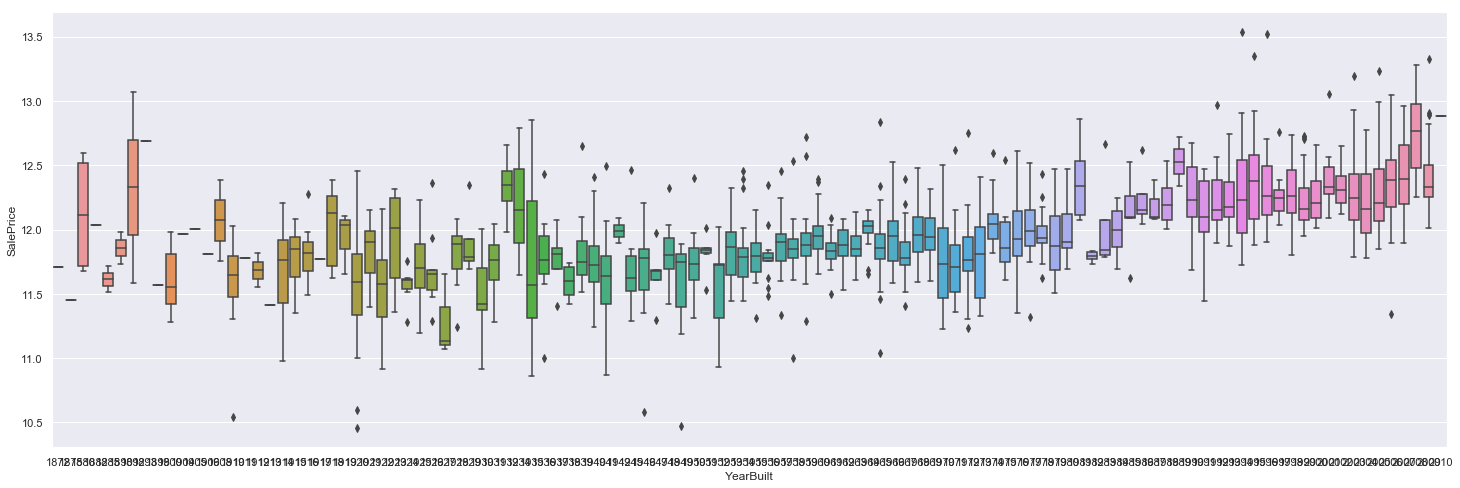

In [801]:
# 'YearBuilt' v.s. 'SalePrice'
#train[['YearBuilt','SalePrice']].groupby(['YearBuilt'],as_index=False).mean().sort_values(by='YearBuilt')
plt.subplots(figsize=(25,8))
sns.boxplot(x='YearBuilt', y='SalePrice', data=train)

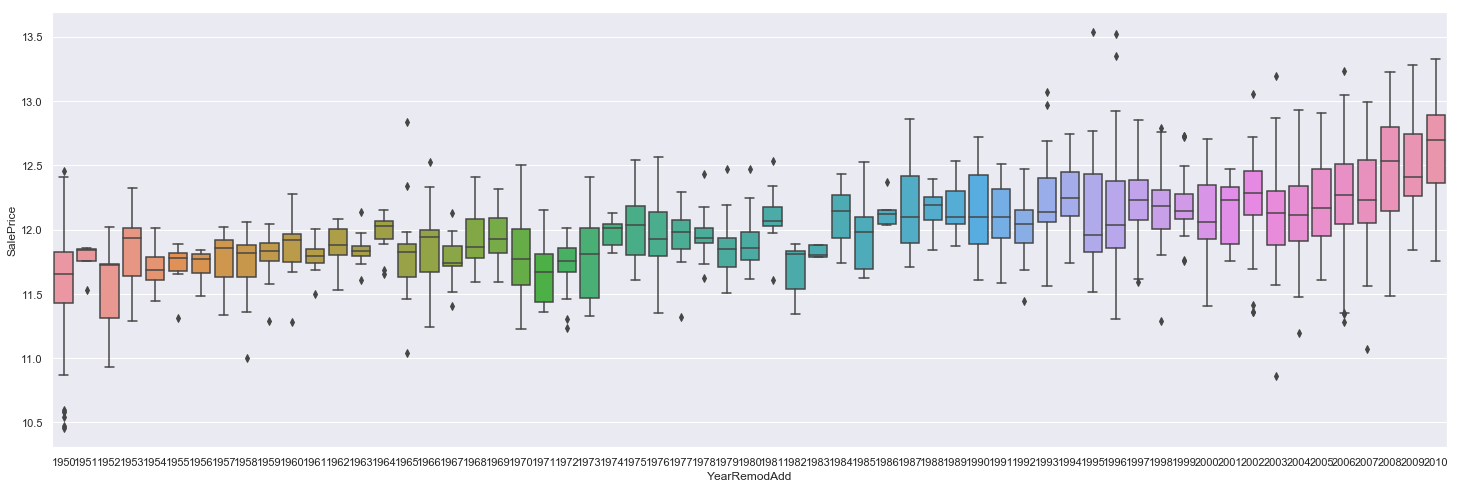

In [802]:
# 'YearRemodAdd' v.s. 'SalePrice'
plt.subplots(figsize=(25,8))
sns.boxplot(x='YearRemodAdd', y='SalePrice', data=train)

In [803]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt','1stFlrSF', 'TotRmsAbvGrd']
#sns.pairplot(train[cols], size = 2.5)
#plt.show()

In [804]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew()) 
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 0.121580
Kurtosis: 0.804751


In [805]:
numerical_features = dataset.dtypes[dataset.dtypes != "object"].index

skewness = dataset[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
#skewness
skewness = pd.DataFrame({'Skew' :skewness})
skewness.head(10)

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [806]:
#kurtosis = dataset.apply(lambda x: kurtosis(x))
#kurtosis.sort_values(ascending=False)

In [807]:
#dataset[numerical_features][skewness_large.index].head()
#skewness_large.head()
#dataset[skewness.index].head()
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 59 skewed numerical features to Box Cox transform


In [808]:
#dataset[skewness.index] = np.log1p(dataset[skewness.index])

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    dataset[feat] = boxcox1p(dataset[feat], lam)

dataset[skewness.index].head()

,MiscVal,PoolArea,LotArea,LowQualFinSF,3SsnPorch,LandSlope,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,ScreenPorch,...,BsmtCond,PavedDrive,BsmtFinType2,GarageQual,CentralAir,GarageCond,GarageYrBlt,Functional,Street,PoolQC
0,0.0,0.0,19.212182,0.0,0.0,0.0,0.730463,0.0,0.000000,0.0,...,1.820334,1.194318,2.259674,2.055642,0.730463,2.055642,14.187527,2.259674,0.730463,1.540963
1,0.0,0.0,19.712205,0.0,0.0,0.0,0.730463,0.0,0.000000,0.0,...,1.820334,1.194318,2.259674,2.055642,0.730463,2.055642,14.145138,2.259674,0.730463,1.540963
2,0.0,0.0,20.347241,0.0,0.0,0.0,0.730463,0.0,0.000000,0.0,...,1.820334,1.194318,2.259674,2.055642,0.730463,2.055642,14.184404,2.259674,0.730463,1.540963
3,0.0,0.0,19.691553,0.0,0.0,0.0,0.730463,0.0,8.797736,0.0,...,0.730463,1.194318,2.259674,2.055642,0.730463,2.055642,14.179714,2.259674,0.730463,1.540963
4,0.0,0.0,21.325160,0.0,0.0,0.0,0.730463,0.0,0.000000,0.0,...,1.820334,1.194318,2.259674,2.055642,0.730463,2.055642,14.182841,2.259674,0.730463,1.540963


In [809]:
# Get dummy categorical features
dataset = pd.get_dummies(dataset)
dataset.shape

(2917, 223)

In [810]:
# Model Building
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import linear_model, svm, gaussian_process
from sklearn.ensemble import RandomForestRegressor

In [811]:
train = dataset[:ntrain]
test = dataset[ntrain:]

#x = train.drop(['SalePrice'],axis=1)
#y = train['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

x_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Utilities_AllPub,Utilities_NoSeWa,Utilities_None
1395,7.033506,7.207860,0.0,1,4,1,1,0.000000,0.000000,6,...,0,0,0,0,0,0,1,1,0,0
532,6.719013,0.000000,0.0,1,2,2,4,0.000000,0.000000,4,...,0,0,0,0,0,0,1,1,0,0
1041,6.685861,6.725034,0.0,1,4,4,3,5.993961,4.174387,2,...,0,0,0,0,0,0,1,1,0,0
1325,6.680855,0.000000,0.0,1,2,0,3,0.000000,0.000000,6,...,0,0,0,0,0,0,1,1,0,0
864,7.224753,0.000000,0.0,1,3,4,3,0.000000,0.000000,6,...,0,0,0,0,1,0,0,1,0,0


In [812]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
#import xgboost as xgb
#import lightgbm as lgb

clfs = {
        'svm':svm.SVR(), 
        'RandomForestRegressor':RandomForestRegressor(n_estimators=400),
        'BayesianRidge':linear_model.BayesianRidge(),
        'LinearRegression':LinearRegression(),
        'Lasso':Lasso(alpha =0.0005, random_state=1),
        'ElasticNet':ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3),
        'KRR':KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
        'GBoost':GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

       }
for clf in clfs:
    try:
        clfs[clf].fit(x_train, y_train)
        y_pred = clfs[clf].predict(x_test)
        print(clf + " cost:" + str(np.sum(y_pred-y_test)/len(y_pred)) )
    except Exception as e:
        print(clf + " Error:")
        print(str(e))

'''
svm cost:0.01643796936781078
RandomForestRegressor cost:0.01400974658990536
BayesianRidge cost:0.009243809203315323
LinearRegression cost:0.008835194682622824
'''

svm cost:0.02525335210681937
RandomForestRegressor cost:-0.00048070236982398145
BayesianRidge cost:-0.005488304041517806
LinearRegression cost:-0.004364179385750243
Lasso cost:-0.004744436116700235
ElasticNet cost:-0.004764394820139366
KRR cost:-0.004219199773222952
GBoost cost:0.0004621794543234661


'\nsvm cost:0.01643796936781078\nRandomForestRegressor cost:0.01400974658990536\nBayesianRidge cost:0.009243809203315323\nLinearRegression cost:0.008835194682622824\n'

In [813]:
#clf = linear_model.BayesianRidge()
clf = svm.SVR()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [814]:
# Cross-Validation (CV)
# Apply K-Fold Cross Validation
accuracies = cross_val_score(estimator=clf,X= x_train,y=y_train,cv=10)
accuracies #Prints out the 10 different Cross Validation scores.

array([0.05216965, 0.03565552, 0.04825579, 0.0968861 , 0.06236614,
       0.02431733, 0.04763134, 0.02138166, 0.05254851, 0.02409615])

In [815]:
accuracies.mean()

#0.8194110476648104 -bayesianRidge
#0.8195618318886264 -LinearRegression

0.04653081832872548

In [816]:
Y_pred = clf.predict(test)
Y_pred.shape

(1459,)

In [817]:
o_test = pd.read_csv('test.csv')

submission = pd.DataFrame({
        "Id":o_test["Id"],
        "SalePrice": Y_pred
    })
submission.to_csv('submission.csv', index=False)

# Results: 9.45365 -LinearRegression()